<a href="https://colab.research.google.com/github/Sumi-Lee/testrepository/blob/main/%ED%99%98%EA%B2%BD%EB%B3%B4%EA%B1%B4%EB%B9%85%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%B6%84%EC%84%9D_HW1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.datasets import load_iris

iris = load_iris()
iris_data=iris.data
iris_label = iris.target
print('iris target값:', iris_label[[0,50,100]])
print('iris target명:', iris.target_names)

iris target값: [0 1 2]
iris target명: ['setosa' 'versicolor' 'virginica']


In [ ]:
import pandas as pd

iris_df = pd.DataFrame(data= iris_data, columns = iris.feature_names)
iris_df['label']=iris.target
print(iris_df.head(3))

   sepal length (cm)  sepal width (cm)  ...  petal width (cm)  label
0                5.1               3.5  ...               0.2      0
1                4.9               3.0  ...               0.2      0
2                4.7               3.2  ...               0.2      0

[3 rows x 5 columns]


In [ ]:
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [ ]:
temp_data = iris_df.copy()

replace_fct = {0: 'setosa', 1: 'versicolor', 2:'virginica'}
temp_data.columns = ['sepal_length','sepal_width', 'petal_length','petal_width','species']
temp_data['species'] = temp_data['species'].map(replace_fct)

temp_data.head(3)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa


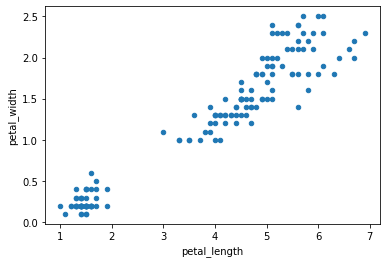

In [ ]:
temp_data.plot(kind='scatter', x='petal_length', y='petal_width')

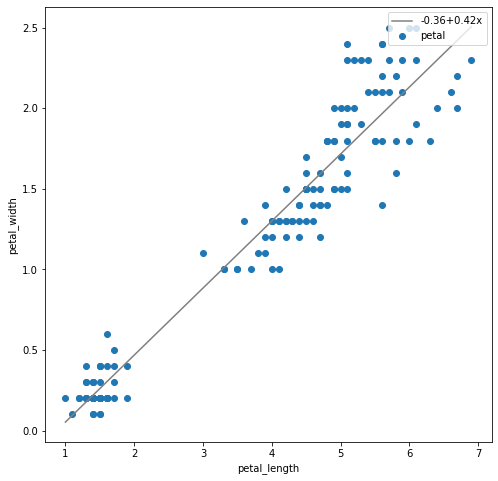

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

pl=np.array(temp_data['petal_length'])[:]
pw=np.array(temp_data['petal_width'])[:]

poly_fit = np.polyfit(pl, pw ,1)
poly_1d = np.poly1d(poly_fit)
xs = np.sort(pl)
ys=poly_1d(xs)

fig = plt.figure(figsize=(8,8))
ax=fig.add_subplot(111)
ax.scatter(pl,pw,label='petal')
ax.plot(xs, ys, color='gray',
       label=f'{poly_fit[1]:.2f}+{poly_fit[0]:.2f}x')
ax.set_xlabel( 'petal_length')
ax.set_ylabel('petal_width')

#범례 표시
ax.legend(loc='upper right')
plt.show()

In [ ]:
import statsmodels.api as sm
results1=sm.OLS(pw, sm.add_constant(pl)).fit()
results1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.927
Model:                            OLS   Adj. R-squared:                  0.927
Method:                 Least Squares   F-statistic:                     1882.
Date:                Fri, 17 Sep 2021   Prob (F-statistic):           4.68e-86
Time:                        07:55:26   Log-Likelihood:                 24.796
No. Observations:                 150   AIC:                            -45.59
Df Residuals:                     148   BIC:                            -39.57
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.3631      0.040     -9.131      0.000      -0.442      -0.285
x1             0.4158      0.010     43.387      0.000       0.397       0.435
==============================================================================
Omnibus:                        5.765   Durbin-Watson:                   1.455
Prob(Omnibus):                  0.056   Jarque-Bera (JB):                5.555
Skew:                           0.359   Prob(JB):                       0.0622
Kurtosis:                       3.611   Cond. No.                         10.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

$$ y=-0.3631 + 0.4158 *x1 $$